# CSML1010 Coding Exercise, Week 4, Dec 15 2019

## Pete Gray ptgray@my.yorku.ca #217653247

## =================================================

## PART 1: Multi-Class Text Classification

Based on code at: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/09/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
2,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
3,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
4,03/18/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,175XX,NaN,NaN,Referral,03/19/2013,Closed with explanation,Yes,No,358304


In [2]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [3]:
df = df[0:6000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 3 to 18894
Data columns (total 18 columns):
Date received                   6000 non-null object
Product                         6000 non-null object
Sub-product                     5256 non-null object
Issue                           6000 non-null object
Sub-issue                       4366 non-null object
Consumer complaint narrative    6000 non-null object
Company public response         2830 non-null object
Company                         6000 non-null object
State                           5977 non-null object
ZIP code                        4659 non-null object
Tags                            1025 non-null object
Consumer consent provided?      6000 non-null object
Submitted via                   6000 non-null object
Date sent to company            6000 non-null object
Company response to consumer    6000 non-null object
Timely response?                6000 non-null object
Consumer disputed?              2317 non-nul

In [5]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [6]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [7]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [8]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [9]:
df.head()

,Product,Consumer_complaint_narrative,category_id
3,Credit card,I am dissatisfied with the current outcome of ...,0
7,"Credit reporting, credit repair services, or o...",On XX/XX/18 an item showed up on my credit rep...,1
8,Debt collection,Saw on my credit report that there is a collec...,2
9,"Credit reporting, credit repair services, or o...",Capital one auto finacing XX/XX/2018 unknown i...,1
11,Credit card or prepaid card,I own a small trucking company. One of my truc...,3


In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

<Figure size 800x600 with 1 Axes>

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(6000, 16849)

In [12]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . atm
       . scottrade
  . Most correlated bigrams:
       . checking account
       . citigold checking
# 'Checking or savings account':
  . Most correlated unigrams:
       . overdraft
       . deposit
  . Most correlated bigrams:
       . checking account
       . savings account
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . chrysler capital
       . auto finance
# 'Credit card':
  . Most correlated unigrams:
       . macy
       . card
  . Most correlated bigrams:
       . synchrony bank
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . purchases
       . card
  . Most correlated bigrams:
       . balance transfer
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . transunion
       . experian
  . Most correlated bigrams:
       . verified disputed
       . disputed resolve

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [14]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [15]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [16]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [17]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

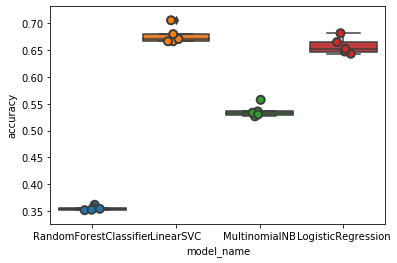

In [19]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.678000
LogisticRegression        0.658000
MultinomialNB             0.536667
RandomForestClassifier    0.355167
Name: accuracy, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

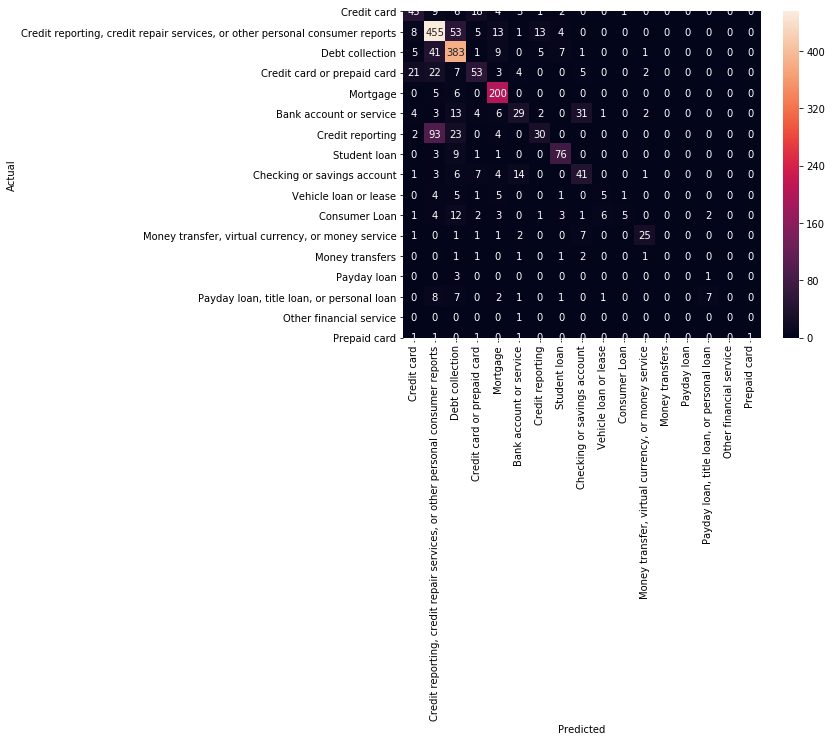

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 8 examples.


,Product,Consumer_complaint_narrative
6930,"Credit reporting, credit repair services, or o...",I noticed in XXXX XXXX that a hard Inquiry was...
12836,"Credit reporting, credit repair services, or o...",The compliant is with Citibank whom I never op...
8125,"Credit reporting, credit repair services, or o...",Some one dryed to apply for a capital one cred...
18632,"Credit reporting, credit repair services, or o...",see attached for full complaint. bank card not...
12840,"Credit reporting, credit repair services, or o...",My American Express show late payment I called...
12879,"Credit reporting, credit repair services, or o...","Hello, I was looking at my credit report via t..."
16087,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX is demanding that I get a ...
788,"Credit reporting, credit repair services, or o...",Capitol One Auto has placed 5-30 day late mark...



'Credit card or prepaid card' predicted as 'Credit card' : 21 examples.


,Product,Consumer_complaint_narrative
11822,Credit card or prepaid card,I am writing to report unexplainable fees char...
16689,Credit card or prepaid card,I am asking for clarification on the Fair Cred...
15336,Credit card or prepaid card,Upon reading Citi Bank 's response letter sent...
12477,Credit card or prepaid card,I WAS CONTACTED BY THIS COMPANY THAT THEY HAD ...
14932,Credit card or prepaid card,I applied for an aadvantage gold credit card w...
6412,Credit card or prepaid card,i am 7 years relationship customer with chase ...
11283,Credit card or prepaid card,"On or about XX/XX/XXXX, My concern is card iss..."
15803,Credit card or prepaid card,"I have a credit card with Discover, first open..."
13530,Credit card or prepaid card,I've already spent 3 months working directly w...
7563,Credit card or prepaid card,Wrong address. No activity. Asked for a card. ...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Consumer_complaint_narrative
1723,Credit card,I have contacted citibank and can not get thro...
8190,Credit card,When my new Citi XXXX was opened in 2014 it wa...
13177,Credit card,I am under the impression that Capital One is ...
18440,Credit card,Complaint against Barclaycard XXXX XXXX advant...
9145,Credit card,Ref : Bank of AmericaI have been working with ...
8525,Credit card,I had an account with Target XXXX Bank Account...
14016,Credit card,PayPal extended me a line of online credit wit...
108,Credit card,i have apply for credit card at Brclysbank DE ...
6439,Credit card,I am a victim of identity theft. We have been ...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 41 examples.


,Product,Consumer_complaint_narrative
14593,Debt collection,The co XXXX XXXX XXXX is claiming that I purch...
4717,Debt collection,I was denied credit due to a collection accoun...
13157,Debt collection,Disputed with the company on XX/XX/2018 and ag...
7172,Debt collection,"reported XXXX XXXX, XXXX XXXX : XXXX damaged c..."
8844,Debt collection,I I have paid agreed the credit collection age...
13895,Debt collection,There is an agreement between XXXX XXXX and pr...
53,Debt collection,"HSBC, I am enclosing a response from XXXX XXXX..."
9143,Debt collection,judgement should have been removed in XX/XX/XX...
10464,Debt collection,My name is XXXX XXXX. \nI have noticed that a ...
6005,Debt collection,Dear Sir/Madam the reason for this compliant i...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 22 examples.


,Product,Consumer_complaint_narrative
12588,Credit card or prepaid card,"Within the last year, I receive on a daily bas..."
6372,Credit card or prepaid card,I was approved for a XXXX XXXX dollar credit c...
5955,Credit card or prepaid card,I am currently Disputing on charge on my credi...
3594,Credit card or prepaid card,I did not receive a statement in XX/XX/XXXX or...
11837,Credit card or prepaid card,I have been going through a severe financial h...
13087,Credit card or prepaid card,"On XXXX XXXX, 2017, I opened a Credit Card wit..."
14740,Credit card or prepaid card,XXXX XXXX make it a practice to periodically c...
6664,Credit card or prepaid card,I am A XXXX Veteran being treated for XXXX XXX...
16371,Credit card or prepaid card,it will not allow me to add external accounts
10580,Credit card or prepaid card,Equifax has been non-compliant with removing t...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 93 examples.


,Product,Consumer_complaint_narrative
16756,Credit reporting,I noticed XXXX wrong addresses on a free credi...
15408,Credit reporting,Inaccurate information on my credit file. Acco...
6288,Credit reporting,Failure to report credit experience correctly ...
12259,Credit reporting,THIS ACCOUNT HAS BEEN REPORTING ON MY CREDIT R...
16386,Credit reporting,The Car Loan for XXXX Lincoln Navigator with X...
...,...,...
2795,Credit reporting,On XX/XX/2015 I refreshed by Trans-union credi...
983,Credit reporting,BACK ON XXXX XXXX 2016 I RECEIVED A CALL FROM ...
104,Credit reporting,Because I filed bankruptcy and included the de...
7943,Credit reporting,TransUnion is making its customers listen to X...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 8 examples.


,Product,Consumer_complaint_narrative
12014,"Payday loan, title loan, or personal loan",XX/XX/XXXX {$5000.00} I applied for the first ...
11657,"Payday loan, title loan, or personal loan",I am currently out on XXXX XXXX after having X...
5739,"Payday loan, title loan, or personal loan",Tide water finance company has reported my pur...
6429,"Payday loan, title loan, or personal loan",TD bank takes exceptionaly long reporting inco...
4173,"Payday loan, title loan, or personal loan",Filed a dispute with an old credit card that h...
7311,"Payday loan, title loan, or personal loan","XXXX, XXXX, XX/XX/2017 I had late payments due..."
5506,"Payday loan, title loan, or personal loan",I received a loan from One Main Financial i n...
3955,"Payday loan, title loan, or personal loan",At the end of XX/XX/XXXX I advised personal Fi...



'Credit card' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
5263,Credit card,I received a call from citi stating that i had...
15659,Credit card,I had a credit card with Banamex. My account i...
14823,Credit card,I paid off my credit card via a third party ag...
13135,Credit card,Someone opened a credit card with XXXX.This wa...
18671,Credit card,I recieved calls and messages from my XXXX bro...
4823,Credit card,I paid a TD Bank ( Target Credit Card ) judgem...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 53 examples.


,Product,Consumer_complaint_narrative
13737,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I received a letter from Avante ...
6645,"Credit reporting, credit repair services, or o...",I am submitting this complaint after numerous ...
10758,"Credit reporting, credit repair services, or o...",XXXX XXXX collection agency contacted me to di...
11488,"Credit reporting, credit repair services, or o...",I keep getting my father 's credit report -- h...
17838,"Credit reporting, credit repair services, or o...",I received notice from XXXX that this creditor...
7939,"Credit reporting, credit repair services, or o...",This account is in someone else name a XXXX XX...
9199,"Credit reporting, credit repair services, or o...",I've been getting emails saying I might be a v...
5499,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX REASON IS EXPLAINED BELOW XX/XX...
9273,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX stated that XXXX XXXX veri...
2779,"Credit reporting, credit repair services, or o...",OnXX/XX/XXXX I enrolled in a debt settlement p...



'Credit card or prepaid card' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
17047,Credit card or prepaid card,Due to miscommunication with Ideal Image and X...
9866,Credit card or prepaid card,"XXXX, XXXX SOC SEC # XXXX DOB XX/XX/XXXX ADDRE..."
1217,Credit card or prepaid card,Sometime several years ago I began getting sta...
12616,Credit card or prepaid card,yes I provided citi bank with all the proof fr...
1956,Credit card or prepaid card,I had opened an Wells Fargo secured credit car...
8599,Credit card or prepaid card,Sears Card. Sears did not answer when I disput...
15669,Credit card or prepaid card,An online purchase was made on XXXX/XXXX/2017 ...



'Mortgage' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
1820,Mortgage,My ex-husband and I took out a second mortgage...
5756,Mortgage,I want to refinance my Mortgage but Select Por...
9095,Mortgage,COMPLAINT # XXXXAfter request for help from XX...
15673,Mortgage,"On XXXX XXXX, 2015, I contacted my lender, Fla..."
3310,Mortgage,XXXX/XXXX/15 here is a copy of the letter I se...
14961,Mortgage,Pacific Union XXXX County Clerk XXXX FL Police...



'Bank account or service' predicted as 'Debt collection' : 13 examples.


,Product,Consumer_complaint_narrative
16662,Bank account or service,On the following dates I used Navy Federal Cre...
16528,Bank account or service,"On at least 5 previous occasions, I request Sc..."
2816,Bank account or service,What justifies CEO XXXX XXXX To get such a lar...
10558,Bank account or service,"I am a victim of ID Theft, I had two accounts ..."
9112,Bank account or service,My account was closed by PNC Bank .... My acco...
15482,Bank account or service,My accounts were closed and {$260000.00} was t...
2302,Bank account or service,I requested to have my account closed and fund...
10583,Bank account or service,"File against : PayPal Credit ( Bill Me Later, ..."
2917,Bank account or service,On XXXX/XXXX/XXXX I cashed a check at US Bank ...
3080,Bank account or service,Union bank reported me to XXXX and ca n't tell...



'Credit reporting' predicted as 'Debt collection' : 23 examples.


,Product,Consumer_complaint_narrative
1727,Credit reporting,This company has a debt on my credit report th...
51,Credit reporting,XXXX addresses are here the I 've never lived ...
6764,Credit reporting,My cell phone contract ended XXXX of 2012 (? i...
4230,Credit reporting,Noticed some fraudulent stuff on my credit rep...
3440,Credit reporting,Experian is showing a debt from XXXX XXXX XXXX...
18333,Credit reporting,The below letters shows XXXX of many attempts ...
5541,Credit reporting,Consolidated Recovery System is reporting coll...
17482,Credit reporting,"XXXX has reported a fraudulent debt, they alle..."
13173,Credit reporting,After receiving a debt that I knew nothing of ...
10521,Credit reporting,XXXX took money from my credit card for paymen...



'Student loan' predicted as 'Debt collection' : 9 examples.


,Product,Consumer_complaint_narrative
12508,Student loan,The lender continues to attempt to collect on ...
8833,Student loan,My student loan has been transferred to variou...
9442,Student loan,Got set up with XXXX XXXX in XXXX NY at age XX...
10131,Student loan,I was in a Chapter XXXX bankruptcy that was XX...
12064,Student loan,An appeal dispute was reissued after a plausib...
1814,Student loan,I am co signer on daughters loan and daughter ...
12313,Student loan,I am the cosigner on this loan. Current balanc...
4796,Student loan,Lawsuit filed against me onXX/XX/2016. \nCAN N...
17265,Student loan,I called American Education ServicesXXXX for a...



'Checking or savings account' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
2592,Checking or savings account,"On XX/XX/XXXX, a legal order was put on my acc..."
5667,Checking or savings account,"FACT : My name is XXXX XXXX. On XX/XX/XXXX, Ba..."
5187,Checking or savings account,I have a savings account with XXXX XXXX Bank a...
116,Checking or savings account,The bank keeps charging me fees of {$30.00} a ...
321,Checking or savings account,On XX/XX/XXXX I wrote a check to XXXX XXXX for...
8175,Checking or savings account,"My father, XXXX XXXX XXXX, opened a savings ac..."



'Consumer Loan' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
1274,Consumer Loan,In or around XXXX XXXX I was laid off and soon...
2523,Consumer Loan,"I leased a brand new vehicle and in XXXX 2016,..."
14783,Consumer Loan,"This was for a XXXX bill in Nevada, which I be..."
473,Consumer Loan,I had a car that was financed through Chrysler...
9478,Consumer Loan,I have a car loan with American Credit Accepta...
12241,Consumer Loan,Republic Finance agreed to a reduced payment a...
11933,Consumer Loan,I have a car loan that is through Santander Co...
14179,Consumer Loan,"On, XXXX/XXXX/2015 I received a phone call fro..."
1086,Consumer Loan,"Three years ago, roughly, I partially applied ..."
878,Consumer Loan,On XX/XX/XXXX I leased a car through Nissan. X...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
10690,"Payday loan, title loan, or personal loan",I recieved an installment loan from spot loan....
11400,"Payday loan, title loan, or personal loan",Garnishment Notification and Arrest Notice LEG...
1219,"Payday loan, title loan, or personal loan",I fell Behind on my be payment.. the CSR calle...
7776,"Payday loan, title loan, or personal loan",I had a loan with myloansite.com. I had issues...
17386,"Payday loan, title loan, or personal loan",I hit a hard time with finances when my husban...
15188,"Payday loan, title loan, or personal loan",XX/XX/2017 I took out a XXXX loan from speedyc...
5049,"Payday loan, title loan, or personal loan",I contacted One Main Financial for an installm...



'Credit card' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
3718,Credit card,American Express will not allow me to pay off ...
8733,Credit card,I was a cardholder of Chase Saphire Preffered ...
5548,Credit card,American Express credit cards have a benefit c...
10417,Credit card,I was at XXXX XXXX to purchase appliances on X...
6644,Credit card,I applied for a chase marriott rewards card th...
15342,Credit card,I recently applied for a Chase freedom card. I...
1667,Credit card,I have applied and was approved for a new XXXX...
5913,Credit card,I am submitting a complaint about Lowes ' Stor...
4738,Credit card,I responded to an email I received that appear...
2617,Credit card,"Since XXXX XXXX, I have made payments to the M..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 7 examples.


,Product,Consumer_complaint_narrative
10812,Checking or savings account,"On XXXX XXXX 2017, I opened a business account..."
15023,Checking or savings account,"Dear CFPB, Thank you very for helping me regar..."
18613,Checking or savings account,Claim number XXXX. I disputed a charge and Ban...
11137,Checking or savings account,Below sent to Bank in PDF letter To whom it ma...
18375,Checking or savings account,TD Bank goes out of their way to find creative...
13501,Checking or savings account,on XX/XX/2018 i contacted XXXX XXXX about a un...
3651,Checking or savings account,In XX/XX/XXXX we realized our debit cards were...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 13 examples.


,Product,Consumer_complaint_narrative
10540,"Credit reporting, credit repair services, or o...","XXXX XXXX respond to the complaint, and only r..."
8587,"Credit reporting, credit repair services, or o...",I was closing on a refinance Va Loan on XX/XX/...
15703,"Credit reporting, credit repair services, or o...",My mortgage was sold 4 times since original pu...
5897,"Credit reporting, credit repair services, or o...","Hello, My wife and I just moved to XXXX, WA fo..."
10783,"Credit reporting, credit repair services, or o...",I had a mortgage with XXXX XXXX XXXX undergoin...
2923,"Credit reporting, credit repair services, or o...",My wife and I filled chapter XXXX bankruptcy a...
404,"Credit reporting, credit repair services, or o...",Fifth 3rd Bank has listed in credit reports th...
8968,"Credit reporting, credit repair services, or o...","XXXX XXXX, XXXX First of all, thank you, whom ..."
3285,"Credit reporting, credit repair services, or o...",I have the XXXX XXXX and it need my capital on...
11868,"Credit reporting, credit repair services, or o...",I was mistakenly reported 30 days late and 60 ...



'Debt collection' predicted as 'Mortgage' : 9 examples.


,Product,Consumer_complaint_narrative
5687,Debt collection,Please note that the issue we are having is no...
4333,Debt collection,My ex husband refinanced his house on XX/XX/XX...
13680,Debt collection,"This pertains to Selene Finance, the mortgage ..."
17986,Debt collection,Loan was a home I purchased in XXXX XXXX NV. L...
10644,Debt collection,I am applying for a mortgage ; the debt collec...
10028,Debt collection,Reverse Mortgage Solutions Inc. by and through...
11122,Debt collection,I paid off my timeshare loan ( {$2100.00} ) wi...
541,Debt collection,I am a XXXX XXXX old unemployed and XXXX indiv...
6556,Debt collection,Received a call about a charge off and I reque...



'Bank account or service' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
6657,Bank account or service,Case number : XXXX I do not have any response ...
10889,Bank account or service,My wife and I applied for a Home Equity Line o...
5887,Bank account or service,My mortgage is due the XXXX of each month as u...
9406,Bank account or service,Bank of America ( XXXX ) will not close the cl...
9436,Bank account or service,We are seeking your assistance as an advocate ...
11138,Bank account or service,The representatives of XXXX went to Wells Farg...



'Checking or savings account' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
424,Checking or savings account,Chase is the bank I will no longer bank with. ...
6936,Checking or savings account,"Hello, I opened Citibank Account Package on XX..."
2878,Checking or savings account,I deposited a Business Check written to myself...
16414,Checking or savings account,On XX/XX/XXXX US BANK I had a balance of XXXX ...
11650,Checking or savings account,The card i own was stolen and account hacked. ...
9402,Checking or savings account,Citibank does not properly disclosure how the ...
9104,Checking or savings account,I am a freshman at XXXX College. I opened a st...
17899,Checking or savings account,I have a complaint regarding your ATM machine ...
1056,Checking or savings account,Im continuously harassed while at Wells Fargo ...
3147,Checking or savings account,"On XXXX/XXXX/XXXX SUNTRUST, my bank took out a..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 13 examples.


,Product,Consumer_complaint_narrative
7240,"Credit reporting, credit repair services, or o...",Address is incorrect on my credit report. I ha...
3655,"Credit reporting, credit repair services, or o...",Equifax continues to report that collections f...
12629,"Credit reporting, credit repair services, or o...",I have requested corrections to my personal in...
10435,"Credit reporting, credit repair services, or o...",Transunion has placed a tradeline on my credit...
10557,"Credit reporting, credit repair services, or o...",This complaint is about my credit score. The ...
17097,"Credit reporting, credit repair services, or o...",I have 5 accounts that are on my credit file t...
15067,"Credit reporting, credit repair services, or o...",My case for X/X/2010 should not even be on my ...
14764,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX reports MONTHLY on all XX...
205,"Credit reporting, credit repair services, or o...",PLEASE REMOVE XXXX XXXX OFF AUTH USER. SS # XX...
12498,"Credit reporting, credit repair services, or o...",On XX/XX/2019 I sent a letter to transunion re...



'Debt collection' predicted as 'Student loan' : 7 examples.


,Product,Consumer_complaint_narrative
14101,Debt collection,My signature was copied and used on a promisso...
5121,Debt collection,I received a letter from GC Services Limited P...
12215,Debt collection,I am writing to file a complaint against Abili...
5823,Debt collection,i am a college student every year i apply for ...
5916,Debt collection,This company contacted my employer without my ...
5388,Debt collection,I consolidated my loans through FedLoan Servic...
18403,Debt collection,I enter into a payment plan but it was impossi...



'Bank account or service' predicted as 'Checking or savings account' : 31 examples.


,Product,Consumer_complaint_narrative
13765,Bank account or service,Over {$63.00} was taken from my Comerica check...
16123,Bank account or service,I went to a XXXX ATM and made a deposit. It wa...
14897,Bank account or service,My family and I have had the worst experience ...
15194,Bank account or service,I have XXXX accounts with Wells Fargo. I was t...
16838,Bank account or service,I came across promotional banner on Citibank w...
4661,Bank account or service,A trustee withdrew all money from a checking a...
17374,Bank account or service,We had a XXXX XXXX walk away from us in the mi...
4602,Bank account or service,This company took {$300.00} out of my checking...
1432,Bank account or service,CHASE Bank sent me a letter indicating that it...
3832,Bank account or service,submitted my retirement check to bank through ...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 7 examples.


,Product,Consumer_complaint_narrative
11885,"Money transfer, virtual currency, or money ser...",I previously tried to remove my bank account t...
18194,"Money transfer, virtual currency, or money ser...","Someone fraudulently collected {$290.00}, {$40..."
17913,"Money transfer, virtual currency, or money ser...",Reference ID : XXXX I received an email statin...
13450,"Money transfer, virtual currency, or money ser...",Citizens Bank allowed approximately {$3000.00}...
1753,"Money transfer, virtual currency, or money ser...",I started using heartland payment systems comp...
14878,"Money transfer, virtual currency, or money ser...","Dear XXXX, This is XXXX XXXX, my family is a v..."
15725,"Money transfer, virtual currency, or money ser...","On XX/XX/18, I initiated a wire transfer from ..."



'Consumer Loan' predicted as 'Vehicle loan or lease' : 6 examples.


,Product,Consumer_complaint_narrative
9063,Consumer Loan,Today Ally financial sent and order to XXXX XX...
15309,Consumer Loan,I bought a car originally through a dealership...
2841,Consumer Loan,I co signed a car loan with my husband XXXX XX...
14456,Consumer Loan,miss lead by sells rep during time of purchase...
13984,Consumer Loan,after months of trying to work with USAA to st...
12253,Consumer Loan,My problems began with Santander Consumer USA ...


In [24]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . scottrade
       . bank
  . Top bigrams:
       . xxxx 15
       . nsf fees
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . fees
  . Top bigrams:
       . savings account
       . unable open
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . finance
  . Top bigrams:
       . auto finance
       . inquires credit
# 'Credit card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . credit card
       . synchrony bank
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . external
  . Top bigrams:
       . balance transfer
       . citi bank
# 'Credit reporting':
  . Top unigrams:
       . experian
       . disputed
  . Top bigrams:
       . xxxx bureaus
       . incorrect addresses
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . report
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . 

In [26]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I can't get the money out of the country."
  - Predicted as: 'Debt collection'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'



In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                 Credit card       0.51      0.51      0.51        89
Credit reporting, credit repair services, or other personal consumer reports       0.70      0.82      0.76       552
                                                             Debt collection       0.72      0.85      0.78       453
                                                 Credit card or prepaid card       0.56      0.45      0.50       117
                                                                    Mortgage       0.78      0.95      0.86       211
                                                     Bank account or service       0.51      0.31      0.38        95
                                                            Credit reporting       0.58      0.20      0.29       152
                                                       

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# =========================

# End of Part 1

# ===========================